### Simple Linear Regression
Linear regression is among the simplest regression methods. One of the main advantages of using it is ease of interpreting results. Simple linear regression is special case of regression where target feature is dependent on single variable, and then we find the best fitting line.<br>

##### y = m*x + c <br>

#### Dataset
The dataset is available at __"data/simple_linear_data.csv"__ in the respective challenge's repo.<br><br>
This is the modified version of the dataset 'Student Performance' provided by UCI Machine Learning repository.<br>
Original dataset: https://archive.ics.uci.edu/ml/datasets/student+performance

#### Features (X)
- G2 - second year math grades (numeric: from 0 to 100)

#### Target (y)
- G3 - third year math grades (numeric: from 0 to 100, output target)

#### Objective
To gain understanding of single linear regression through implementing the model from scratch

#### Tasks
- Read the data from above mentioned dataset and define X and y as numpy array
- Add column at position 0 with all values=1 (pandas.DataFrame.insert function)
- Print rows from 40 to 55.
- Print the shape and datatype of both X and y
- Follow code cells to implement simple linear regression from scratch
    - Write hypothesis function to predict values
    - Write function for calculating mean_squared_error
    - Write function to return gradients for given weights
    - Perform gradient descent taking help of above functions

#### Further Fun (will not be evaluated
- Remove outliers, train again and see the difference in error.
```python
# Add this line before defining X and y
data = data[(data['G3']!=0)|((data['G2']==0)&(data['G3']==0))]
```
- Replace "*weights = np.random.rand(2)*" line in gradient descent with below line, train again and visualize results.
```python
# Replace above line with following in gradient descent function
weights = np.zeros(2,)
```
- Play with learning rate and max_iterations
- Generalize the code for multivariate(multiple) linear regression

#### Resources
- Linear regression maths: https://www.youtube.com/watch?v=ZkjP5RJLQF4
- Simple linear regression: https://www.youtube.com/watch?v=iAgYLRy7e20
- Tutorial: https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python


In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
!wget https://github.com/DeepConnectAI/challenge-week-2/raw/master/data/simple_linear_data.csv

--2020-08-21 09:54:44--  https://github.com/DeepConnectAI/challenge-week-2/raw/master/data/simple_linear_data.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DeepConnectAI/challenge-week-2/master/data/simple_linear_data.csv [following]
--2020-08-21 09:54:44--  https://raw.githubusercontent.com/DeepConnectAI/challenge-week-2/master/data/simple_linear_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2326 (2.3K) [text/plain]
Saving to: ‘simple_linear_data.csv.1’

simple_linear_data. 100%[===================>]   2.27K  --.-KB/s    in 0s      

2020-08-21 09:54:45 (43.0 MB/s) - ‘simple_linear_

In [77]:
# Read the data from provided dir

data = pd.read_csv('./simple_linear_data.csv')

In [78]:
# Add column which has all 1s
# The idea is that weight corresponding to this column is equal to intercept
# This way it is efficient and easier to handle the bias/intercept term

data.insert(0, column='G1', value=1)
data.head()

,G1,G2,G3
0,1,30,30
1,1,25,30
2,1,40,50
3,1,70,75
4,1,50,50


In [79]:
# Print the dataframe rows
print(data.loc[40:50])

    G1  G2   G3
40   1  50   55
41   1  60   60
42   1  90   90
43   1  40   55
44   1  50   45
45   1  40   30
46   1  60   55
47   1  95  100
48   1  75   70
49   1  35   35
50   1  65   65


In [80]:
# Define X (input features) and y (output feature) 
X = np.array(data[data.columns[0:2]])
y = np.array(data['G3'])

In [81]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(395, 2)
y: Type-<class 'numpy.ndarray'>, Shape-(395,)


__Expected output__:<br><br>
X: Type-<class 'numpy.ndarray'>, Shape-(395,2)<br>
y: Type-<class 'numpy.ndarray'>, Shape-(395,)

Let us visualize the relationship between X and y

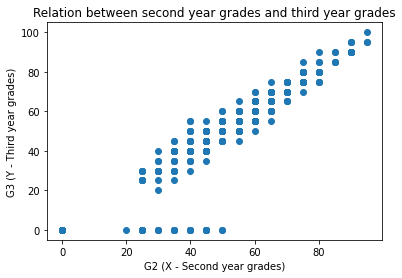

In [82]:
# DO NOT EDIT THIS CODE CELL
plt.scatter(X[:,1],y)
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()

##### Let us start implementing linear regression from scratch. Just follow code cells, see hints if required.

In [83]:
def predict(X, weights):
    '''
    weights   : array (2,1) w0 and w1
    X         : array (m,2) x0 (intercept=1) and x1
    
    Returns predicted y using hyothesis linear function defined by given weights
    '''
    ### START CODE HERE ###
    #y_pred = X[0]*weights[0]+X[1]*weights[1]
    y_pred = np.dot(X,weights)
    #y_pred = X*weights
    ### END CODE HERE ###
    #print(y_pred)
    #print(X.shape[0])
    assert (y_pred.shape==(X.shape[0],)), 'Wrong implementation of predict function. Check carefully'
    
    return y_pred

In [84]:
def mean_squared_error(y_true, y_pred) : 
    '''
    y_true : (m,1)
    y_pred : (m,1)
    
    Return the mean squared error
    '''
    ### START CODE HERE ###
    loss = np.square(np.subtract(y_true,y_pred)).mean() 
    ### END CODE HERE ###
    
    return loss

In [85]:
def gradient(X, y_true, y_pred):
    '''
    X      : array (m,2)
    y_true : array (m,1)
    y_pred : array (m,1)
    
    Returns a numpy array with gradients. Shape (2,1)
    '''
    # Initialize the gradient vector for w0 (intercept/bias) and w1 respectively
    grad = np.zeros(2,)
    
    ### START CODE HERE ###
    
    grad[1] =- 2*np.mean((X[:,1]*(y_true-y_pred)) )
    grad[0] =- 2*np.mean((y_true-y_pred) )
    
    ### END CODE HERE ###
    
    return grad

In [86]:
def gradient_descent(X, y, learning_rate=0.00001, max_iterations=100):
    '''
    X              : Array (m,2)
    y              : Array (m,1)
    learning_rate  : Learning rate
    max_iterations : Maximum iteratons
    
    Returns : weights vector (2,1)
            : losses (List)
    '''
    # Initialise weights vector of random values of size (2,1)
    weights = np.random.rand(2)
    #weights = np.zeros(2,)
    #weights = np.array([1.0,1.0])
    # Initialize a list to record all the losses 
    losses  = []
    
    ### START CODE HERE ###
    for i in range(max_iterations):
      y_pred = predict(X,weights)
      losses.append(mean_squared_error(y,y_pred))
      temp = gradient(X,y,y_pred)
      #temp[0] = sum(temp[0])/len(X[:,0])
      #temp[1] = sum(temp[1])/len(X[:,0])
      weights-=(learning_rate*temp)

          
    ### END CODE HERE ###
    
    return weights, losses

##### Congratulations! You have implemented linear regression from scratch. Let's see this in action.

In [87]:
# Perform gradient descent
optimal_weights, losses = gradient_descent(X, y)

In [88]:
# DO NOT CHANGE THE FOLLOWING CODE CELLS
# Print final loss
print("Mean squared error:", losses[-1])

Mean squared error: 101.08231022178953


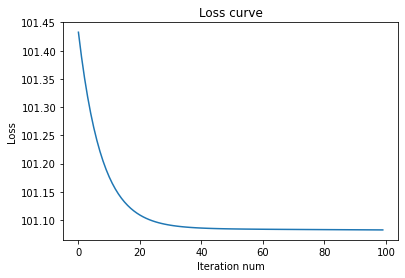

In [89]:
# Plot the loss curve
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [90]:
def hypothesis(X, weights):
    '''
    weights   : array (2,1) w0 and w1
    X         : array (m,2) x0 (intercept=1) and x1
    
    Returns predicted y using hyothesis linear function defined by given weights
    '''
    ### START CODE HERE ###
    #y_pred = X[0]*weights[0]+X[1]*weights[1]
    y_pred = np.dot(X,weights)
    #y_pred = X*weights
    ### END CODE HERE ###
    print(y_pred)
    print(X.shape[0])
    assert (y_pred.shape==(X.shape[0],)), 'Wrong implementation of predict function. Check carefully'
    
    return y_pred

In [91]:
# Make predictions using trained weights
y_pred = hypothesis(X, optimal_weights)

[29.88131703 24.99795989 39.64803131 68.94817415 49.41474559 73.83153129
 59.18145987 24.99795989 88.4816027  73.83153129 39.64803131 59.18145987
 68.94817415 49.41474559 78.71488842 68.94817415 68.94817415 49.41474559
 24.99795989 49.41474559 68.94817415 73.83153129 73.83153129 64.06481701
 44.53138845 44.53138845 59.18145987 78.71488842 54.29810273 59.18145987
 54.29810273 78.71488842 78.71488842 49.41474559 68.94817415 34.76467417
 78.71488842 78.71488842 59.18145987 64.06481701 49.41474559 59.18145987
 88.4816027  39.64803131 49.41474559 39.64803131 59.18145987 93.36495984
 73.83153129 34.76467417 64.06481701 64.06481701 54.29810273 49.41474559
 64.06481701 44.53138845 73.83153129 73.83153129 49.41474559 78.71488842
 54.29810273 39.64803131 49.41474559 44.53138845 49.41474559 73.83153129
 64.06481701 34.76467417 44.53138845 78.71488842 73.83153129 49.41474559
 29.88131703 59.18145987 59.18145987 44.53138845 54.29810273 54.29810273
 39.64803131 24.99795989 59.18145987 49.41474559 29

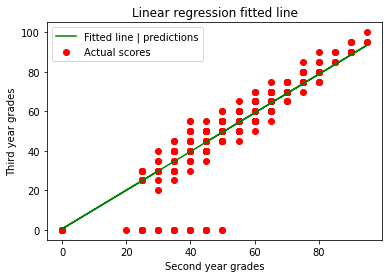

In [92]:
# Visualize the results by plotting it
plt.scatter(X[:,1], y, c='r', label='Actual scores')
plt.plot(X[:,1], y_pred, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.xlabel("Second year grades")
plt.ylabel("Third year grades")
plt.show()